# Lab 6 - Keras Neural Networks
## Nick Bias
### 5/16/22
## Goal: Predict Diabetes
### Libraries 

In [1]:
import pandas as pd
import numpy as np

# Needed for Neural Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report

# For other model to compare with 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# For Evaluations 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# So results are same when re-run
import random
random.seed(10)

# This helps display all columns when looking at dataset
pd.set_option('display.max_columns', None)

## Import Data

In [2]:
data50 = pd.read_csv("Data/Week7/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data50.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


We can see that many of the variables are simple dummy variables, that got read in as floats. These will need to be converted for analysis. 

## Cleaning Data

In [3]:
# Converting variables that were floats to integers for analysis 
data50['Diabetes_binary'] = data50['Diabetes_binary'].astype(int)
data50['HighBP'] = data50['HighBP'].astype(int)
data50['HighChol'] = data50['HighChol'].astype(int)
data50['CholCheck'] = data50['CholCheck'].astype(int)
data50['Smoker'] = data50['Smoker'].astype(int)
data50['Stroke'] = data50['Stroke'].astype(int)
data50['HeartDiseaseorAttack'] = data50['HeartDiseaseorAttack'].astype(int)
data50['PhysActivity'] = data50['PhysActivity'].astype(int)
data50['Fruits'] = data50['Fruits'].astype(int)
data50['Veggies'] = data50['Veggies'].astype(int)
data50['HvyAlcoholConsump'] = data50['HvyAlcoholConsump'].astype(int)
data50['AnyHealthcare'] = data50['AnyHealthcare'].astype(int)
data50['NoDocbcCost'] = data50['NoDocbcCost'].astype(int)
data50['GenHlth'] = data50['GenHlth'].astype(int)
data50['MentHlth'] = data50['MentHlth'].astype(int)
data50['PhysHlth'] = data50['PhysHlth'].astype(int)
data50['DiffWalk'] = data50['DiffWalk'].astype(int)
data50['Sex'] = data50['Sex'].astype(int)
data50['Age'] = data50['Age'].astype(int)
data50['Education'] = data50['Education'].astype(int)
data50['Income'] = data50['Income'].astype(int)

data50

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26.0,0,0,0,1,0,1,0,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26.0,1,1,0,0,1,0,0,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26.0,0,0,0,1,1,1,0,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28.0,1,0,0,1,1,1,0,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29.0,1,0,0,1,1,1,0,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37.0,0,0,0,0,0,1,0,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29.0,1,0,1,0,1,1,0,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25.0,0,0,1,0,1,0,0,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18.0,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4


Everything that was done to the previous dataset will be repeated on this one.

### Splitting Prediction Variable from dataset
- X = Dataset with all Independent Variables 
- y = The Dependent Variable of Heart Disease

In [38]:
y = data50["Diabetes_binary"]
X = data50.drop("Diabetes_binary", axis=1)

In [39]:
# Splitting data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Models
Since the Target class is extremely unbalanced, We will be looking at the Precision, (proportion of positive identifications that are actually correct) and Recall (proportion of actual positives that were identified correctly). 

In [7]:
# used so it will not print all epochs
class Callback(tf.keras.callbacks.Callback):
    SHOW_NUMBER = 10
    counter = 0
    epoch = 0

In [8]:
# This creates a Function that will Evalutate the models, by looking at Accuracy, Recall, Precision and ROC Curve
# This will be helpful in seeing how well the target class is being predicted 
def model_eval(model, X_test, y_test):
    assert len(X_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[::, 1]
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
    plt.legend()
    plt.show()

[[4979 2130]
 [1552 5478]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6531
           1       0.78      0.72      0.75      7608

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



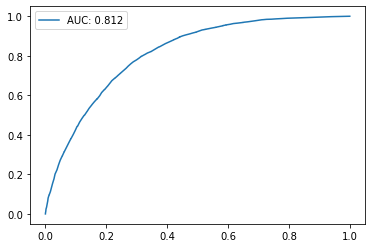

In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_eval(model, X_test, y_test)

A default Random Forest Model only achieved an accuracy of about 74%. The Diabetes target class only had a Precision of 78%, which was the highest metric it achieved. The Recall is 72%. Overall, these scores are decent for a dataset of this size and complexity, however we can still test to see if Neural Networks perform better. 

In [33]:
# Model 1
model = Sequential()
model.add(Dense(100, input_dim=21, activation='relu')) # Default activation is relu
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(X_train, y_train, batch_size = 64, epochs = 50, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

442/442 [==============================] - 1s 2ms/step - loss: 0.5164 - sparse_categorical_accuracy: 0.7460
Test loss: 0.5164164900779724
Test accuracy: 0.7459509372711182


In [34]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(metrics.confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

221/221 [==============================] - 1s 2ms/step
[[5309 1671]
 [1921 5238]]
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75      6980
         1.0       0.76      0.73      0.74      7159

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Model 1 achieved an accuracy of about 75%. This is only a 1% increase than the Random Forest model. Precision is 76% for the Diabetes target class. This means that 76% diabetes identifications that are actually correct. Recall is 73%. So only 73% of actual positives diabetes that were identified correctly. These Precision and Recall scores are slightly worse than the Random Forest model. The only reason this model is better is because the Precision for non-diabetes is higher. Maybe if we increase the complexity of the Neural Network, it will perform better. 

In [25]:
# Model 2
model = Sequential()
model.add(Dense(400, input_dim=21, activation='sigmoid')) # Default activation is relu
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #default learning rate = 0.001
    metrics=["accuracy"],
)

history_scaled = model.fit(X_train, y_train, batch_size = 12, epochs = 100, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

442/442 [==============================] - 2s 3ms/step - loss: 0.6028 - accuracy: 0.7305
Test loss: 0.602776825428009
Test accuracy: 0.730461835861206


In [26]:
y_pred = model.predict(X_test, batch_size=12, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(metrics.confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

1179/1179 [==============================] - 3s 3ms/step
[[4713 2267]
 [1544 5615]]
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      6980
         1.0       0.71      0.78      0.75      7159

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



Model 2 achieved an accuracy of 73%. This is the worst performing model, however, not by much. Its recall for the diabetes is 78%, however, its precision is only 71%. Its recall for non-diabetes is 68%. So overall, this model is not a good fit for this data. Other models should be used to progress.

In [37]:
# Model 3
model = Sequential()
model.add(Dense(400, input_dim=21, activation='sigmoid')) # Default activation is relu
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(X_train, y_train, batch_size = 50, epochs = 100, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

test_scores = model.evaluate(X_test, y_test, verbose = 1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

442/442 [==============================] - 2s 4ms/step - loss: 0.5082 - sparse_categorical_accuracy: 0.7544
Test loss: 0.5082109570503235
Test accuracy: 0.7543673515319824


In [38]:
y_pred = model.predict(X_test, batch_size=50, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(metrics.confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

283/283 [==============================] - 2s 5ms/step
[[4565 2415]
 [1058 6101]]
              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72      6980
         1.0       0.72      0.85      0.78      7159

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



This was my most complex model, yet it still did barely any better than the first model. It achieved an accurcy over 75%. Its recall for the target variable was 85%. This means that 85% of actual positives diabetes that were identified correctly. The Precision was much worse at 72%, meaning 72% of diabetes identifications that are actually correct. THe Precision for not diabetes is 81%, which is very good, but the recall is 65%. Overall the model is not horrible, but as it is the best performing model, it will proceed to the next stage.

After trying mutiple sets of Nueral Network models, I believe that 75% accuracy is the best accuracy that can be achieved with data of this size and complexity. I will now take the best model (Model 3) and fit it to the whole evenly split data. From there I will then under and Oversample the full dataset and see how the model performs. 

## Original Unbalanced Data

In [13]:
data = pd.read_csv("Data/Week7/diabetes_binary_health_indicators_BRFSS2015.csv")

# Converting variables that were floats to integers for analysis 
data['Diabetes_binary'] = data['Diabetes_binary'].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data['HighChol'] = data['HighChol'].astype(int)
data['CholCheck'] = data['CholCheck'].astype(int)
data['Smoker'] = data['Smoker'].astype(int)
data['Stroke'] = data['Stroke'].astype(int)
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype(int)
data['PhysActivity'] = data['PhysActivity'].astype(int)
data['Fruits'] = data['Fruits'].astype(int)
data['Veggies'] = data['Veggies'].astype(int)
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype(int)
data['AnyHealthcare'] = data['AnyHealthcare'].astype(int)
data['NoDocbcCost'] = data['NoDocbcCost'].astype(int)
data['GenHlth'] = data['GenHlth'].astype(int)
data['MentHlth'] = data['MentHlth'].astype(int)
data['PhysHlth'] = data['PhysHlth'].astype(int)
data['DiffWalk'] = data['DiffWalk'].astype(int)
data['Sex'] = data['Sex'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Education'] = data['Education'].astype(int)
data['Income'] = data['Income'].astype(int)

In [23]:
data["Diabetes_binary"].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

The model will first be fit to the evenly split data

In [9]:
y = data50["Diabetes_binary"]
X = data50.drop("Diabetes_binary", axis=1)

# Model 3
model = Sequential()
model.add(Dense(400, input_dim=21, activation='sigmoid')) # Default activation is relu
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(400, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(), #default learning rate = 0.001
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history_scaled = model.fit(X, y, batch_size = 50, epochs = 100, use_multiprocessing=True, callbacks=[Callback()], verbose=0) # default max iterations are 200

## Undersampling 
This is a technique used to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

I will used the original unbalanced data to predict on and see how well this model performs.

In [14]:
y_test = data["Diabetes_binary"]
X_test = data.drop("Diabetes_binary", axis=1)

undersample = RandomUnderSampler(sampling_strategy="majority")
X_over, y_over = undersample.fit_resample(X, y)

y_pred = model.predict(X_over, batch_size=50, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(metrics.confusion_matrix(y_over, y_pred_bool))
print(classification_report(y_over, y_pred_bool))

1414/1414 [==============================] - 7s 5ms/step
[[25418  9928]
 [ 7401 27945]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75     35346
           1       0.74      0.79      0.76     35346

    accuracy                           0.75     70692
   macro avg       0.76      0.75      0.75     70692
weighted avg       0.76      0.75      0.75     70692



When the original data was undersampled, the model was still only able to achieve an accuracy of about 75%. The Precision for diabetes was only 74%, and the Recall was 79%. Overall, these scores are alright. Next we will test is oversampling has any noticable differences. 

## Oversampling
The process of sampling a signal at a sampling frequency significantly higher than the Nyquist rate.

In [36]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

#y_pred = model.predict(X_over, batch_size=64, verbose=1)
#y_pred_bool = y_pred.astype(int).tolist() 

Y_pred = np.argmax(model.predict(X_over),axis=1)

print(metrics.confusion_matrix(y_over, Y_pred))
print(classification_report(y_over, Y_pred))

[[25418  9928]
 [ 7401 27945]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75     35346
           1       0.74      0.79      0.76     35346

    accuracy                           0.75     70692
   macro avg       0.76      0.75      0.75     70692
weighted avg       0.76      0.75      0.75     70692



Oversampling achieved the exact same scores as Undersampling. I believe that this dataset is too massive and complex that it is difficult for the models to accurately predict diabetes well. Overall, 75% accuracy is good for a massive dataset this complex. 